In [1]:
import os, sys
import numpy as np
import h5netcdf

import xarray as xr
import xarray.ufuncs as xu
import pandas as pd

from matplotlib import pyplot as plt

import cartopy.crs as ccrs
import cartopy

plt.rc("figure", figsize=(16,4))
plt.rc("font", size=14)
ccrs.PlateCarree()

from dask.distributed import Client, LocalCluster
from dask.base import compute
cluster = LocalCluster(processes=False, n_workers=1, threads_per_worker=4, protocol = 'tcp://', host = '137.129.155.67')
client = Client(cluster)
client



/home/durandy/miniconda3/envs/towel/lib/python3.9/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46795 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://137.129.155.67:46795/status,
Dashboard: http://137.129.155.67:46795/status,Workers: 1
Total threads: 4,Total memory: 78.61 GiB
Status: running,Using processes: False
Comm: tcp://137.129.155.67:45149,Workers: 1
Dashboard: http://137.129.155.67:46795/status,Total threads: 4
Started: Just now,Total memory: 78.61 GiB
Comm: tcp://137.129.155.67:36531,Total threads: 4
Dashboard: http://137.129.155.67:39257/status,Memory: 78.61 GiB
Nanny: None,


In [2]:
indir_data_FILTERED = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/ANALYSIS/VARIANCE/'

ds = xr.open_mfdataset(indir_data_FILTERED + 'TCWV_YEAR.nc', chunks = {'time' : 1}, parallel = True)

ds

<xarray.Dataset>
Dimensions:      (lat: 241, lon: 1440)
Coordinates:
  * lat          (lat) float64 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * lon          (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
Data variables:
    TCWV_Kelvin  (lat, lon) float64 dask.array<chunksize=(241, 1440), meta=np.ndarray>
    TCWV_Rossby  (lat, lon) float64 dask.array<chunksize=(241, 1440), meta=np.ndarray>
    TCWV_MJO     (lat, lon) float64 dask.array<chunksize=(241, 1440), meta=np.ndarray>
    TCWV_MRG     (lat, lon) float64 dask.array<chunksize=(241, 1440), meta=np.ndarray>
    TCWV_EIG     (lat, lon) float64 dask.array<chunksize=(241, 1440), meta=np.ndarray>
    TCWV_WIG     (lat, lon) float64 dask.array<chunksize=(241, 1440), meta=np.ndarray>
    TCWV_TD      (lat, lon) float64 dask.array<chunksize=(241, 1440), meta=np.ndarray>
    TCWV_LF      (lat, lon) float64 dask.array<chunksize=(241, 1440), meta=np.ndarray>

In [3]:
map_proj = ccrs.Mercator(central_longitude=180.0, 
                         min_latitude=-30.1, 
                         max_latitude=30.1,
                         globe=None)

# plt.rc("figure", figsize=(20,14))
cmap ='viridis'
vmin, vmax = -10, +10

colorbar = {'label': 'TCWV $kg^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both'}


In [4]:
ds_Var = ds

# Variance de la colonne d'eau filtré pour la MJO

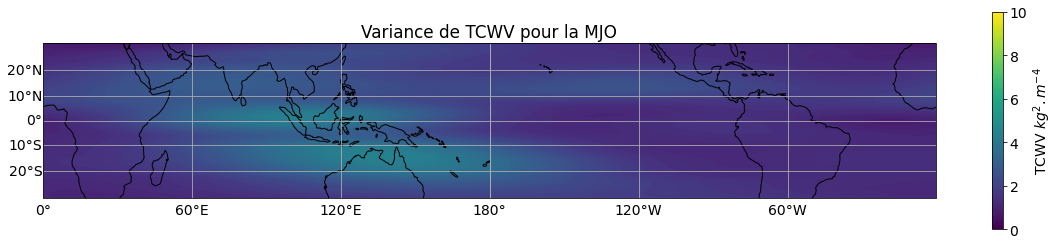

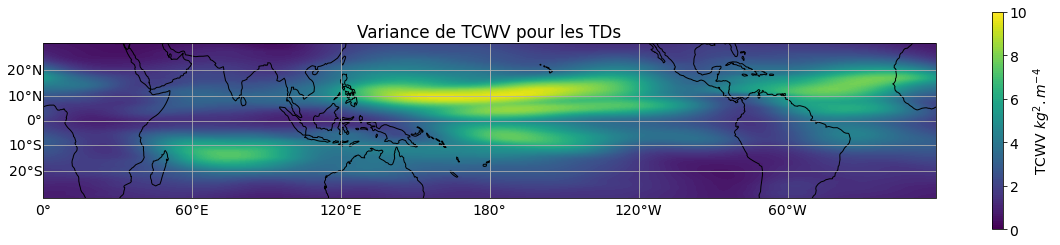

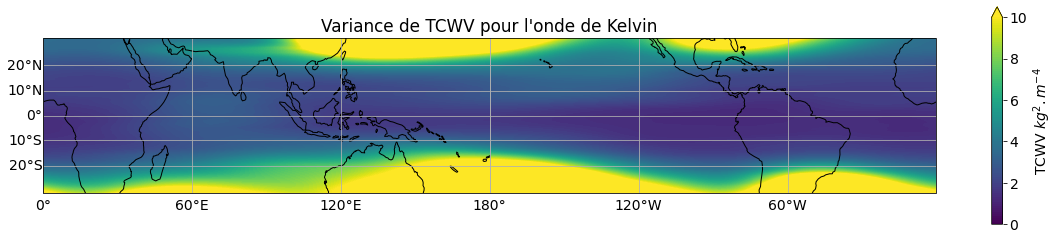

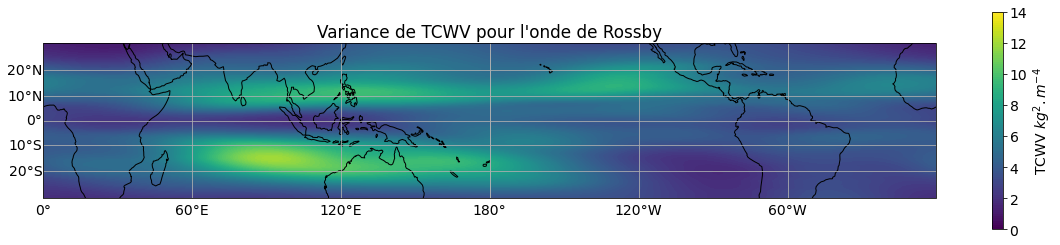

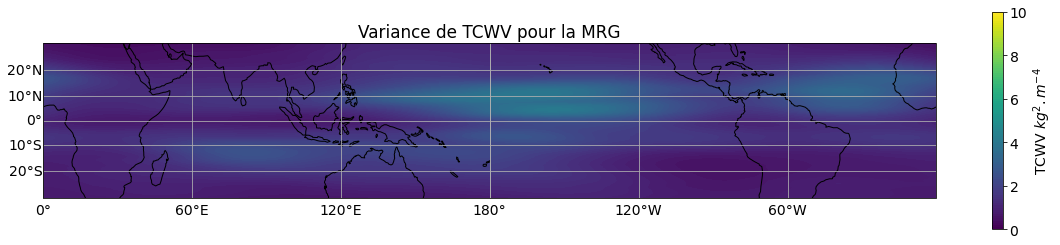

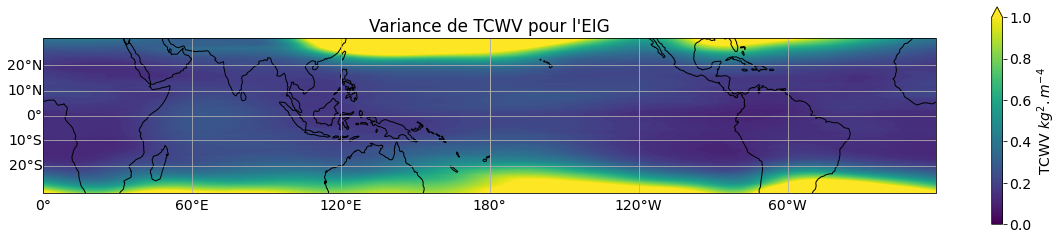

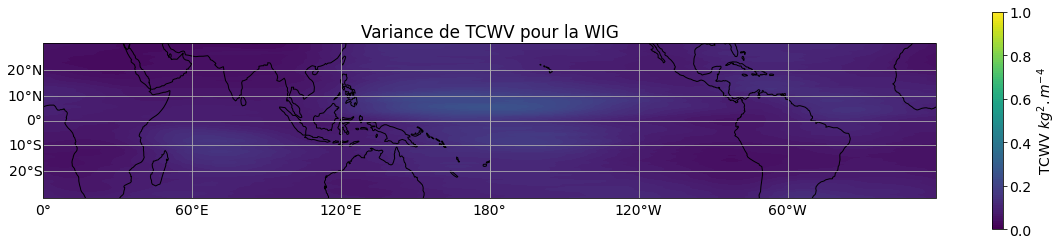

In [5]:
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 10
levelsT = np.linspace(0,vmax,6)
    
colorbar = {'label': 'TCWV $kg^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}
#####################################################################################

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

ds_Var['TCWV_MJO'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour la MJO")

plt.show()

#####################################################################################
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

ds_Var['TCWV_TD'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour les TDs")

plt.show()

#####################################################################################
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

ds_Var['TCWV_Kelvin'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour l'onde de Kelvin")
plt.show()

#####################################################################################
levelsT = np.linspace(0,14,8)
    
colorbar = {'label': 'TCWV $kg^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

ds_Var['TCWV_Rossby'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax+4,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour l'onde de Rossby")

plt.show()

#####################################################################################
vmin, vmax = 0, 10
levelsT = np.linspace(0,vmax,6)
    
colorbar = {'label': 'TCWV $kg^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

ds_Var['TCWV_MRG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour la MRG")

plt.show()

#####################################################################################
vmin, vmax = 0, 1
levelsT = np.linspace(0,vmax,6)
    
colorbar = {'label': 'TCWV $kg^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

ds_Var['TCWV_EIG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour l'EIG")

plt.show()

#####################################################################################
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

ds_Var['TCWV_WIG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour la WIG")
plt.show()

# #####################################################

In [6]:
_ds_plot = xr.open_mfdataset(indir_data_FILTERED + 'TCWV_JFM.nc', chunks = {'time' : 1}, parallel = True)


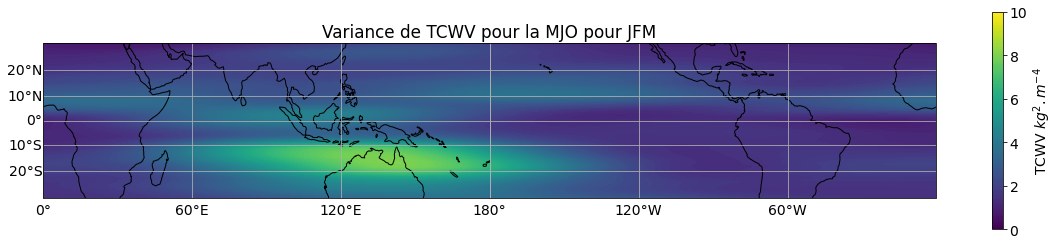

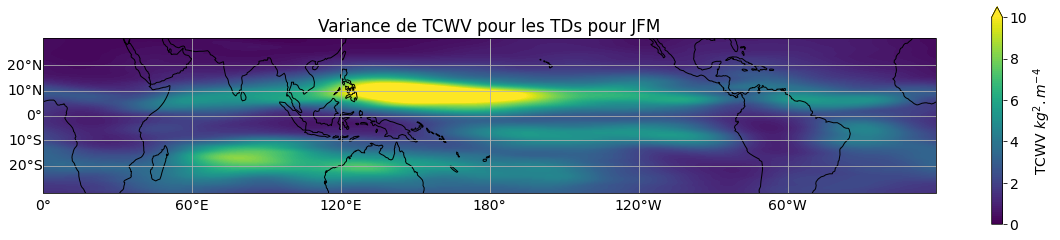

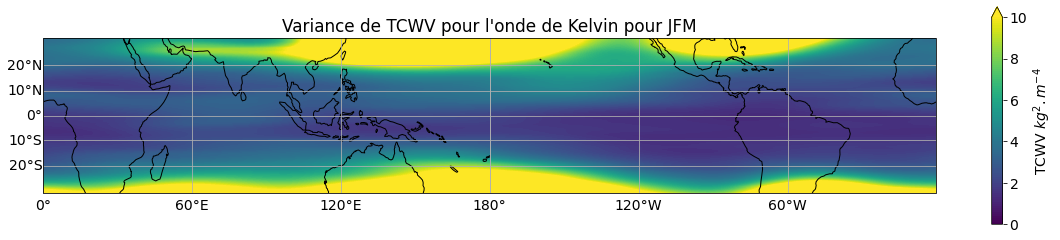

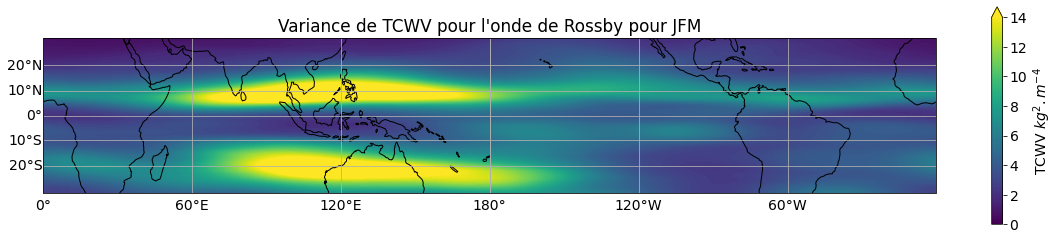

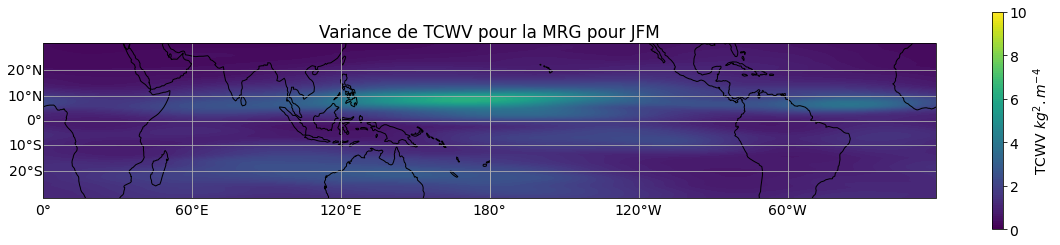

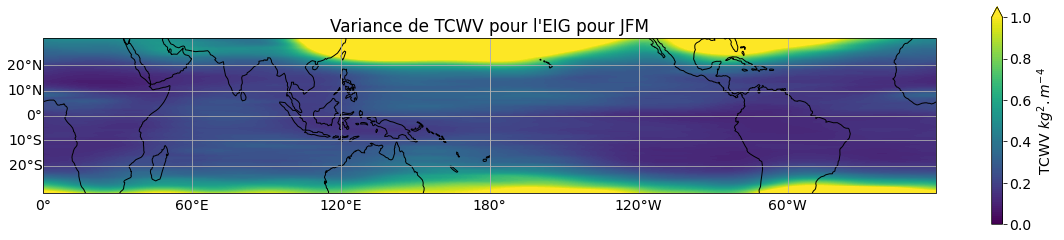

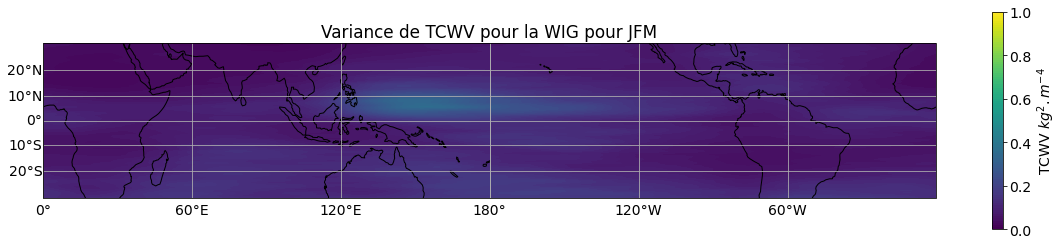

In [7]:
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 10
levelsT = np.linspace(0,vmax,6)
    
colorbar = {'label': 'TCWV $kg^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}
#####################################################################################

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_MJO'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour la MJO pour JFM")

plt.show()

#####################################################################################
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_TD'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour les TDs pour JFM")

plt.show()

#####################################################################################
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_Kelvin'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour l'onde de Kelvin pour JFM")
plt.show()

#####################################################################################
levelsT = np.linspace(0,14,8)
    
colorbar = {'label': 'TCWV $kg^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_Rossby'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax+4,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour l'onde de Rossby pour JFM")

plt.show()

#####################################################################################
vmin, vmax = 0, 10
levelsT = np.linspace(0,vmax,6)
    
colorbar = {'label': 'TCWV $kg^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_MRG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour la MRG pour JFM")

plt.show()

#####################################################################################
vmin, vmax = 0, 1
levelsT = np.linspace(0,vmax,6)
    
colorbar = {'label': 'TCWV $kg^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_EIG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour l'EIG pour JFM")

plt.show()

#####################################################################################
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_WIG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour la WIG pour JFM")
plt.show()

# #####################################################

In [8]:
_ds_plot = xr.open_mfdataset(indir_data_FILTERED + 'TCWV_AMJ.nc', chunks = {'time' : 1}, parallel = True)


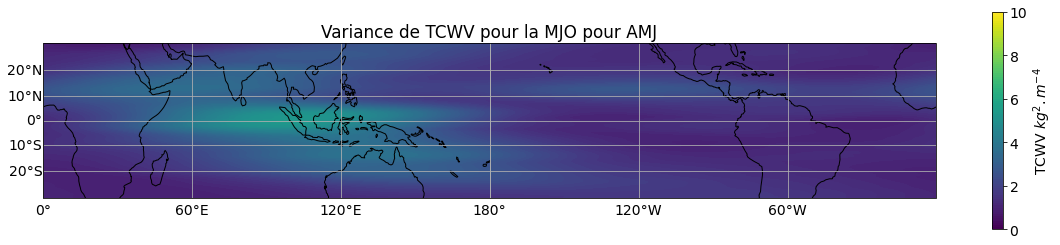

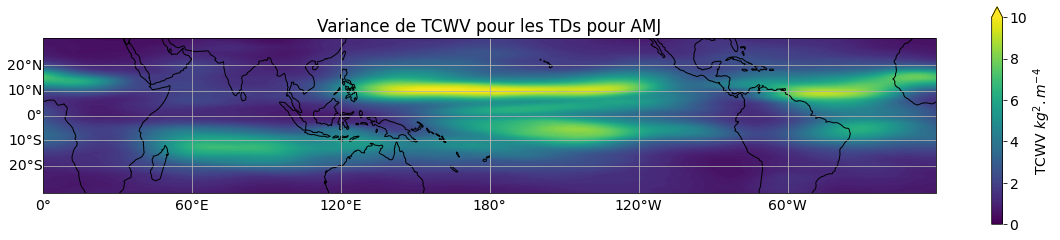

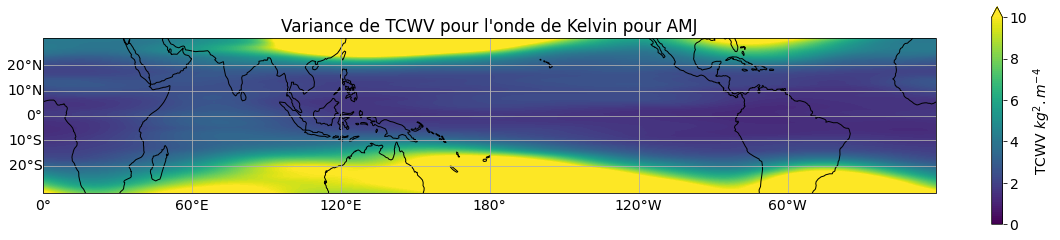

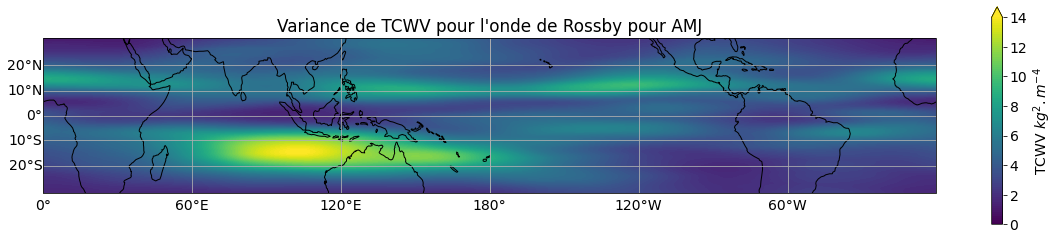

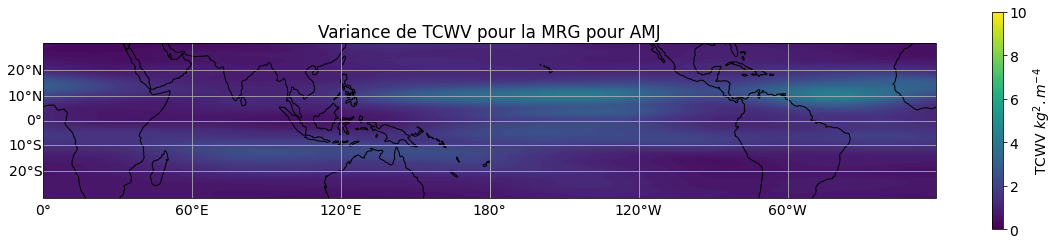

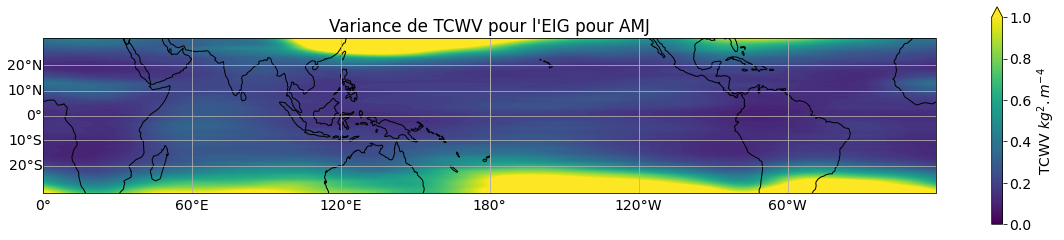

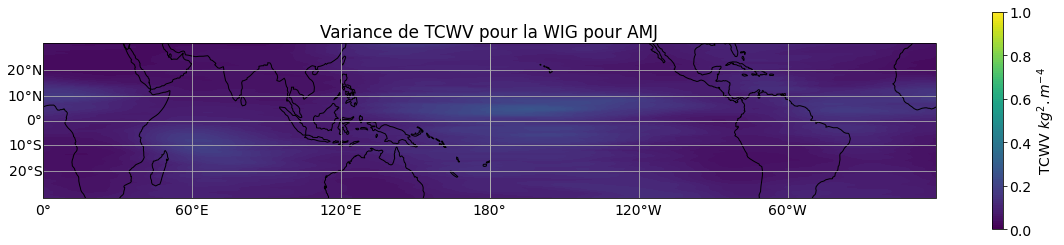

In [9]:
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 10
levelsT = np.linspace(0,vmax,6)
    
colorbar = {'label': 'TCWV $kg^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}
#####################################################################################

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_MJO'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour la MJO pour AMJ")

plt.show()

#####################################################################################
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_TD'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour les TDs pour AMJ")

plt.show()

#####################################################################################
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_Kelvin'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour l'onde de Kelvin pour AMJ")
plt.show()

#####################################################################################
levelsT = np.linspace(0,14,8)
    
colorbar = {'label': 'TCWV $kg^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_Rossby'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax+4,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour l'onde de Rossby pour AMJ")

plt.show()

#####################################################################################
vmin, vmax = 0, 10
levelsT = np.linspace(0,vmax,6)
    
colorbar = {'label': 'TCWV $kg^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_MRG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour la MRG pour AMJ")

plt.show()

#####################################################################################
vmin, vmax = 0, 1
levelsT = np.linspace(0,vmax,6)
    
colorbar = {'label': 'TCWV $kg^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_EIG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour l'EIG pour AMJ")

plt.show()

#####################################################################################
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_WIG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour la WIG pour AMJ")
plt.show()

# #####################################################

In [10]:
_ds_plot = xr.open_mfdataset(indir_data_FILTERED + 'TCWV_JAS.nc', chunks = {'time' : 1}, parallel = True)


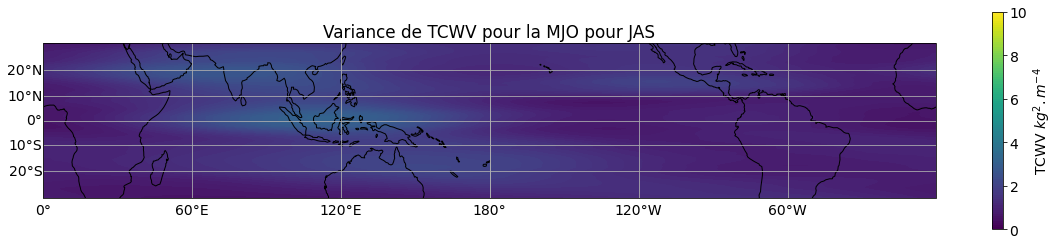

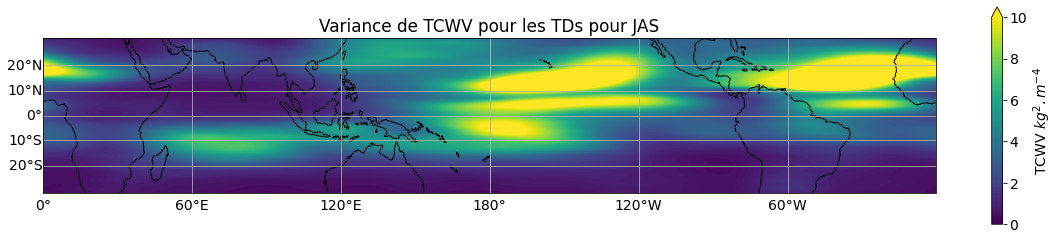

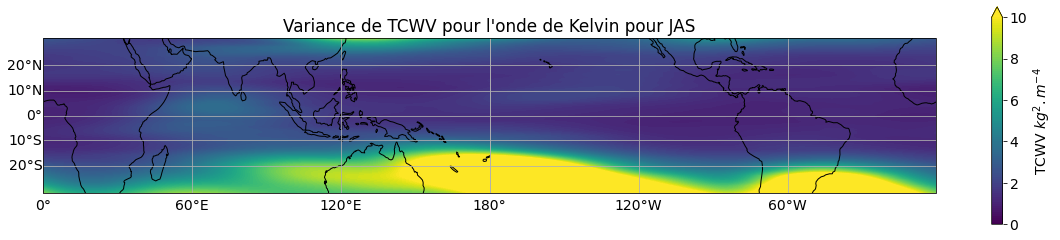

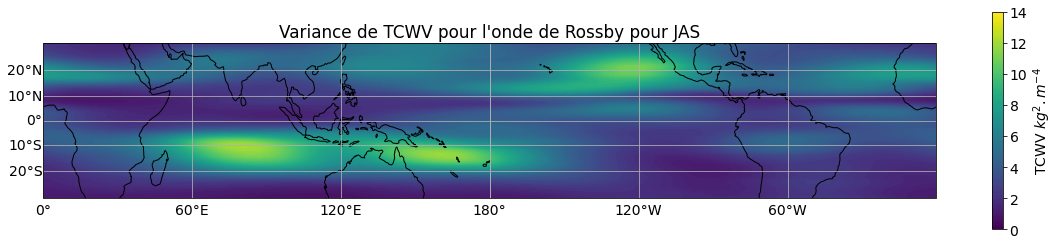

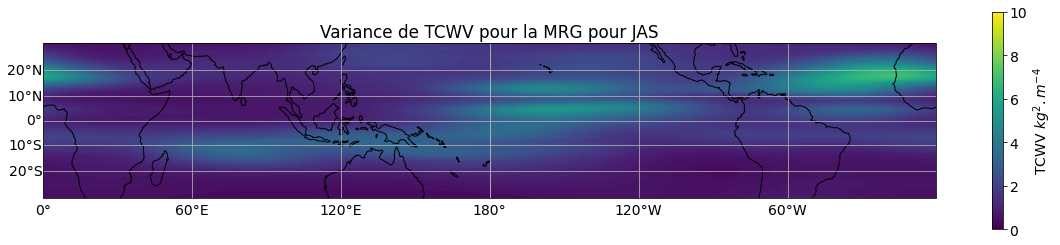

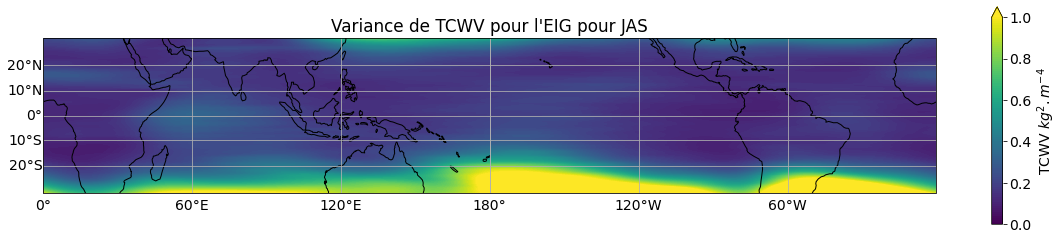

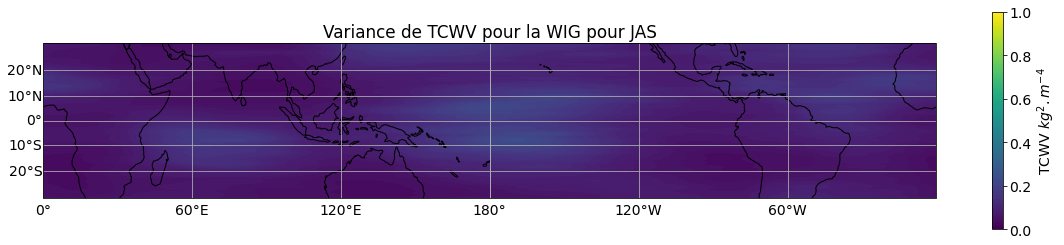

In [11]:
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 10
levelsT = np.linspace(0,vmax,6)
    
colorbar = {'label': 'TCWV $kg^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}
#####################################################################################

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_MJO'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour la MJO pour JAS")

plt.show()

#####################################################################################
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_TD'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour les TDs pour JAS")

plt.show()

#####################################################################################
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_Kelvin'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour l'onde de Kelvin pour JAS")
plt.show()

#####################################################################################
levelsT = np.linspace(0,14,8)
    
colorbar = {'label': 'TCWV $kg^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_Rossby'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax+4,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour l'onde de Rossby pour JAS")

plt.show()

#####################################################################################
vmin, vmax = 0, 10
levelsT = np.linspace(0,vmax,6)
    
colorbar = {'label': 'TCWV $kg^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_MRG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour la MRG pour JAS")

plt.show()

#####################################################################################
vmin, vmax = 0, 1
levelsT = np.linspace(0,vmax,6)
    
colorbar = {'label': 'TCWV $kg^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_EIG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour l'EIG pour JAS")

plt.show()

#####################################################################################
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_WIG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour la WIG pour JAS")
plt.show()

# #####################################################

In [12]:
_ds_plot = xr.open_mfdataset(indir_data_FILTERED + 'TCWV_OND.nc', chunks = {'time' : 1}, parallel = True)


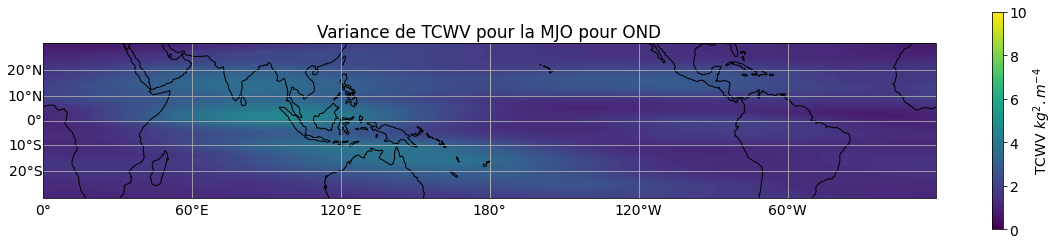

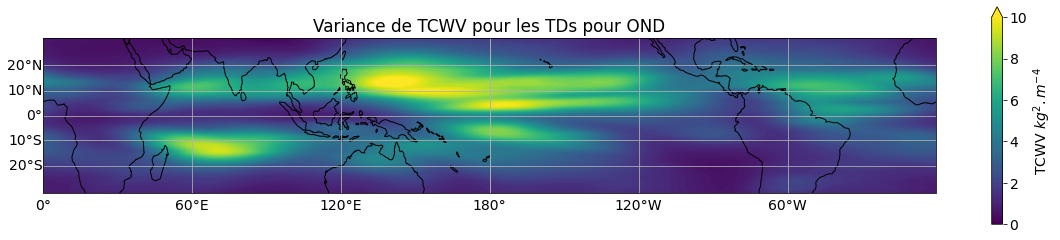

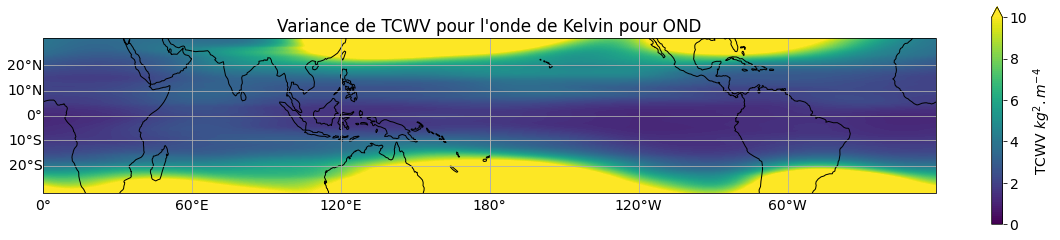

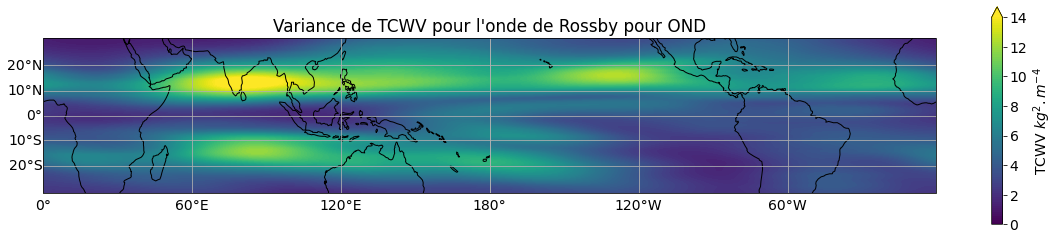

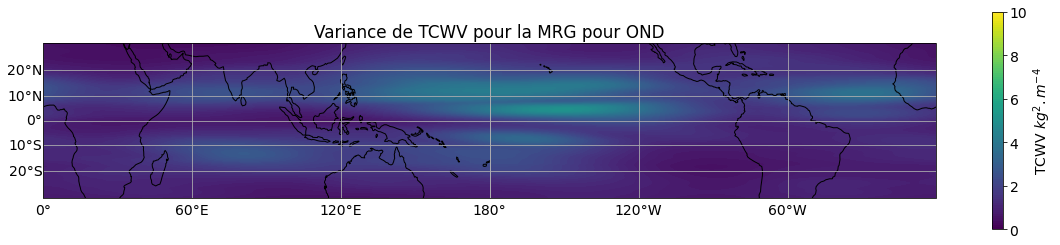

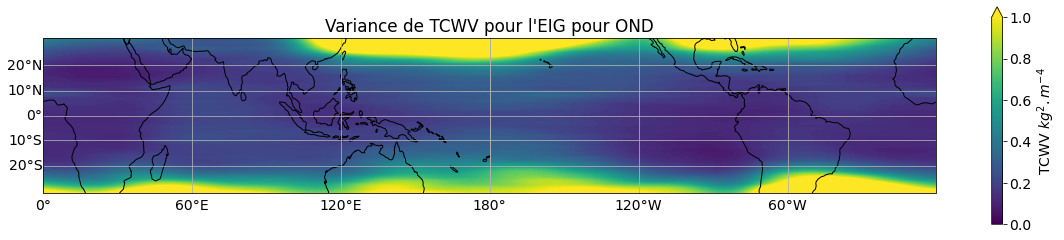

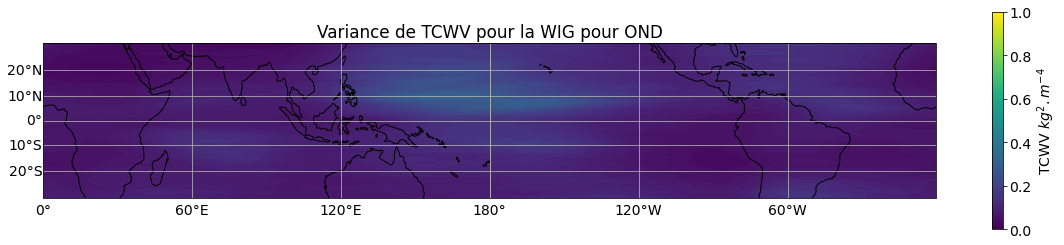

In [13]:
# plt.rc("figure", figsize=(20,14))
vmin, vmax = 0, 10
levelsT = np.linspace(0,vmax,6)
    
colorbar = {'label': 'TCWV $kg^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}
#####################################################################################

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_MJO'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour la MJO pour OND")

plt.show()

#####################################################################################
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_TD'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour les TDs pour OND")

plt.show()

#####################################################################################
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_Kelvin'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour l'onde de Kelvin pour OND")
plt.show()

#####################################################################################
levelsT = np.linspace(0,14,8)
    
colorbar = {'label': 'TCWV $kg^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_Rossby'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax+4,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour l'onde de Rossby pour OND")

plt.show()

#####################################################################################
vmin, vmax = 0, 10
levelsT = np.linspace(0,vmax,6)
    
colorbar = {'label': 'TCWV $kg^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_MRG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour la MRG pour OND")

plt.show()

#####################################################################################
vmin, vmax = 0, 1
levelsT = np.linspace(0,vmax,6)
    
colorbar = {'label': 'TCWV $kg^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both',
           'ticks': levelsT}

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_EIG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour l'EIG pour OND")

plt.show()

#####################################################################################
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,4), subplot_kw={'projection': map_proj})

_ds_plot['TCWV_WIG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title("Variance de TCWV pour la WIG pour OND")
plt.show()